In [1]:
from flask import Flask, render_template, redirect
from flask_pymongo import PyMongo
import pandas as pd
import urllib.request
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
app = Flask(__name__)

In [3]:
from splinter import Browser
from bs4 import BeautifulSoup
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    executable_path = {"executable_path": "C:\chrome_driver\chromedriver.exe"}
    return Browser("chrome", **executable_path, headless=False)


In [4]:
import requests
url = urllib.request.urlopen("http://www.rasmussenreports.com/public_content/politics/trump_administration/trump_approval_index_history").read()
soup = BeautifulSoup(url,'lxml')

In [6]:
def p2f(x): # this is code i stole to strip percentages and convert to number, it also skips function if blank
    if not x:
        return x
    else:
        return float(x.strip('%'))/100

In [7]:
table = soup.find('table')
table_rows = table.find_all('tr')
date = []
Aproval = []
for tr in table_rows:
    td = tr.find_all('td')
    #print(td.text)
    n =0
    row = []
    for i in td:
        a=i.text
        if n==0:
            date.append(a)
            n =n+1
        elif n == 4:
            Aproval.append(p2f(a))
            n = n+1
        else:
            n = n+1      

In [8]:
print(date)
print(Aproval)

['18-Oct-19', '17-Oct-19', '16-Oct-19', '15-Oct-19', '14-Oct-19', '11-Oct-19', '10-Oct-19', '09-Oct-19', '08-Oct-19', '07-Oct-19', '04-Oct-19', '03-Oct-19', '02-Oct-19', '01-Oct-19', '30-Sep-19', '27-Sep-19', '26-Sep-19', '25-Sep-19', '24-Sep-19', '23-Sep-19', '20-Sep-19', '19-Sep-19', '18-Sep-19', '17-Sep-19', '16-Sep-19', '13-Sep-19', '12-Sep-19', '11-Sep-19', '10-Sep-19', '09-Sep-19', '06-Sep-19', '05-Sep-19', '04-Sep-19', '03-Sep-19', '02-Sep-19', '30-Aug-19', '29-Aug-19', '28-Aug-19', '27-Aug-19', '26-Aug-19', '23-Aug-19', '22-Aug-19', '21-Aug-19', '20-Aug-19', '19-Aug-19', '16-Aug-19', '15-Aug-19', '14-Aug-19', '13-Aug-19', '12-Aug-19', '09-Aug-19', '08-Aug-19', '07-Aug-19', '06-Aug-19', '05-Aug-19', '02-Aug-19', '01-Aug-19', '31-Jul-19', '30-Jul-19', '29-Jul-19', '26-Jul-19', '25-Jul-19', '24-Jul-19', '23-Jul-19', '22-Jul-19', '19-Jul-19', '18-Jul-19', '17-Jul-19', '16-Jul-19', '15-Jul-19', '12-Jul-19', '11-Jul-19', '10-Jul-19', '09-Jul-19', '08-Jul-19', '05-Jul-19', '04-Jul-19'

Text(0, 0.5, 'Trump Aproval rating')

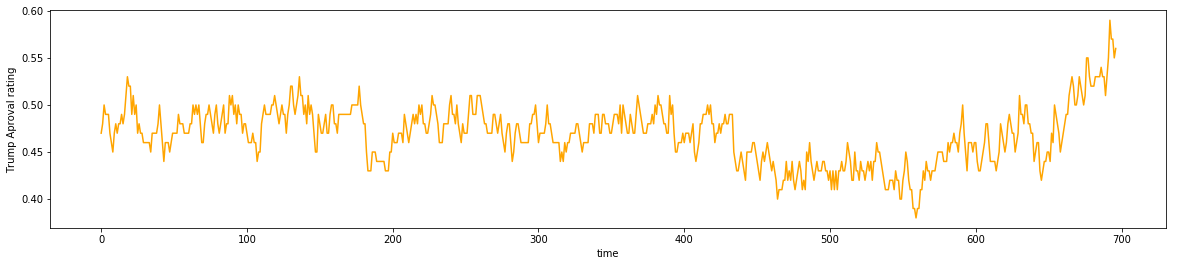

In [9]:
fig= plt.figure(figsize=(20,4))
plt.plot(Aproval, color ='Orange')
plt.xlabel('time')
plt.ylabel('Trump Aproval rating')